In [86]:
# Evaluation

In [2]:
import pandas as pd

In [3]:
results = pd.read_csv('../evaluation/results.csv')

In [44]:
results.columns

Index(['run', 'blackbox', 'model', 'learner', 'rules', 'coverage', 'seed',
       'model_number', 'specificity_without', 'precision_without',
       'recall_without', 'time_without', 'and_without', 'or_without',
       'predicates_without', 'specificity_with', 'precision_with',
       'recall_with', 'time_with', 'and_with', 'or_with', 'predicates_with',
       'time_influential'],
      dtype='object')

In [46]:
unique_values = results['coverage'].unique()
unique_values

array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [5]:
#group together data of different runs
group_results = results.groupby(['blackbox', 'model', 'learner', 'rules', 'coverage', 'seed', 'model_number'])

#new data frame with mean of computation times
combined_results = group_results.agg({'time_without': 'mean', 'time_with': 'mean'}).reset_index()

In [6]:
combined_results.

,blackbox,model,learner,rules,coverage,seed,model_number,time_without,time_with
0,bank,rfc,0,bayesian,0.3,12345678,1,249.3838,489.8476
1,bank,rfc,0,bayesian,0.3,23456789,2,195.0084,195.0092
2,bank,rfc,0,bayesian,0.3,34567890,3,214.2722,441.4734
3,bank,rfc,0,bayesian,0.3,45678901,4,192.0940,570.2462
4,bank,rfc,0,bayesian,0.3,56789012,5,192.6636,677.9494
...,...,...,...,...,...,...,...,...,...
3485,water,rfc,6,tree,0.6,12345678,1,0.4502,0.4562
3486,water,rfc,6,tree,0.6,23456789,2,0.4714,0.4714
3487,water,rfc,6,tree,0.6,34567890,3,0.4134,0.4134
3488,water,rfc,6,tree,0.6,45678901,4,0.5132,0.5132


In [41]:
average_f = pd.read_csv('../evaluation/final_average_fscore_coverage.csv')
average_f

,blackbox_,learner_,rules_,fscore_with_median
0,bank,0,bayesian,0.363
1,bank,0,induction,0.394
2,bank,0,islearn,-1.000
3,bank,0,tree,0.420
4,bank,2,bayesian,0.383
...,...,...,...,...
258,water,5,tree,0.440
259,water,6,bayesian,0.415
260,water,6,induction,0.420
261,water,6,islearn,-1.000


In [35]:
blackbox = "bank"

In [36]:
selected_rows = average_f[(average_f['rules_'] == 'induction') & (average_f['blackbox_'] == blackbox)]

In [37]:
selected_rows

,blackbox_,learner_,rules_,fscore_with_median
1,bank,0,induction,0.394
5,bank,2,induction,0.382
9,bank,3,induction,0.382
13,bank,4,induction,0.382
17,bank,5,induction,0.375
21,bank,6,induction,0.381


In [38]:
df_time = pd.read_csv('../evaluation/final_average_time_coverage.csv')

In [39]:
selected_rows = df_time[(df_time['rules_'] == 'induction') & (df_time['blackbox_'] == blackbox)]

In [40]:
selected_rows

,blackbox_,learner_,rules_,time_with_median
1,bank,0,induction,840.666
5,bank,2,induction,100.303
9,bank,3,induction,201.622
13,bank,4,induction,209.521
17,bank,5,induction,206.108
21,bank,6,induction,299.285


In [43]:
## comb

comb = pd.read_csv('../evaluation/final_combined_results.csv')
comb

,blackbox_,learner_,rules_,coverage_,time_without_min,time_without_max,time_without_median,time_without_std,time_with_min,time_with_max,...,time_influential_median,time_influential_std,fscore_without_min,fscore_without_max,fscore_without_median,fscore_without_std,fscore_with_min,fscore_with_max,fscore_with_median,fscore_with_std
0,bank,0,bayesian,0.3,192.094,249.384,195.008,24.529,195.009,677.949,...,-1.000,0.000,0.280,0.360,0.320,0.033,0.264,0.409,0.360,0.054
1,bank,0,bayesian,0.4,186.469,237.388,199.280,23.535,192.430,1212.436,...,-1.000,0.000,0.280,0.360,0.320,0.033,0.221,0.409,0.360,0.090
2,bank,0,bayesian,0.5,194.541,248.495,204.249,26.376,431.457,1239.764,...,-1.000,0.000,0.280,0.360,0.320,0.033,0.221,0.409,0.371,0.091
3,bank,0,bayesian,0.6,194.995,249.217,198.665,24.094,438.558,1291.540,...,-1.000,0.000,0.280,0.360,0.320,0.033,0.221,0.395,0.371,0.089
4,bank,0,bayesian,0.7,191.477,248.479,207.355,23.456,691.381,1764.844,...,-1.000,0.000,0.280,0.360,0.320,0.033,0.174,0.392,0.376,0.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,water,5,tree,0.8,0.475,0.525,0.521,0.022,0.480,0.554,...,0.457,0.065,0.394,0.455,0.436,0.024,0.394,0.450,0.424,0.024
694,water,6,bayesian,0.6,194.895,224.038,208.029,12.988,200.257,543.571,...,0.396,0.008,0.397,0.429,0.400,0.014,0.389,0.458,0.415,0.027
695,water,6,induction,0.6,9.745,15.862,14.428,2.559,27.175,83.819,...,0.566,0.081,0.046,0.427,0.399,0.162,0.399,0.446,0.420,0.021
696,water,6,islearn,0.6,174.964,181.955,176.742,3.200,-1.000,-1.000,...,0.406,0.075,0.401,0.438,0.420,0.015,-1.000,-1.000,-1.000,0.000


In [ ]:
'run', 'blackbox', 'number_of_features', 'rules', 'coverage', 'specificity_with', 'precision_with',
       'recall_with', 'time_with','time_influential'

In [ ]:
df = rules[rules['rules'] != 'islearn']

<Figure size 1000x600 with 0 Axes>

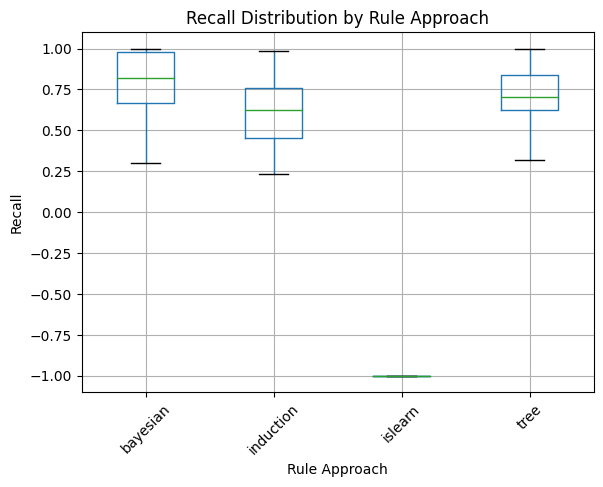

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if different

# Create a box plot of the recall over all runs for each rule-approach over all subjects
plt.figure(figsize=(10, 6))
results.boxplot(column='recall_with', by='rules')
plt.title('Recall Distribution by Rule Approach')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Rule Approach')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

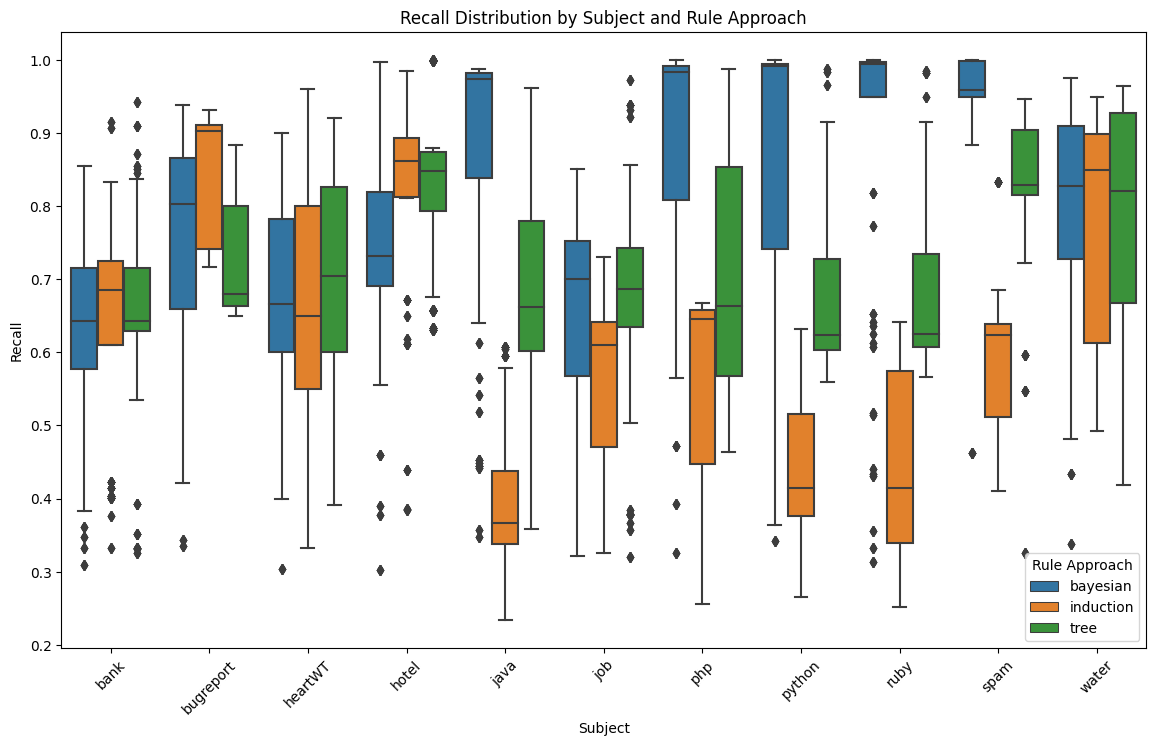

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if different


plt.figure(figsize=(14, 8))
sns.boxplot(x='blackbox', y='recall_with', hue='rules', data=df)
plt.title('Recall Distribution by Subject and Rule Approach')
plt.xlabel('Subject')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.legend(title='Rule Approach')
plt.show()

In [54]:
df = results[results['rules'] != 'islearn']

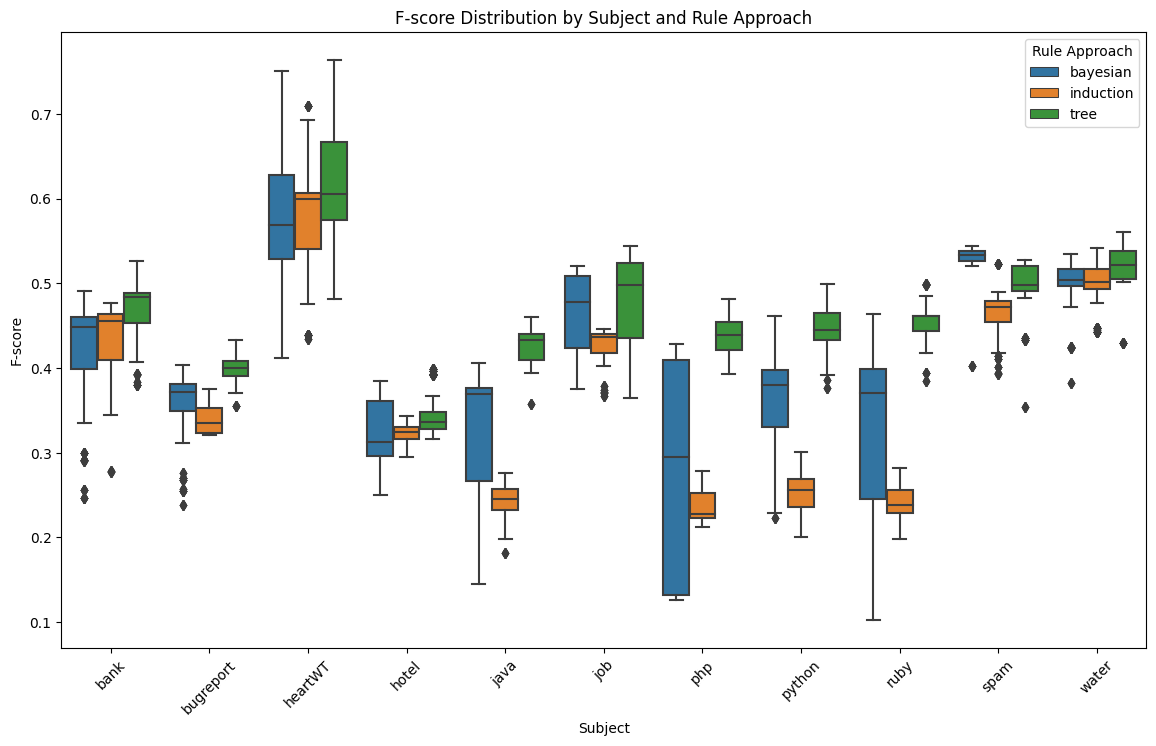

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if different

# Drop rows where rules == 'islearn'
df = df[df['rules'] != 'islearn']

# Calculate F-score
df['fscore'] = 2 * (df['precision_with'] * df['recall_with']) / (df['precision_with'] + df['recall_with'])

# Create the box plot for F-score
plt.figure(figsize=(14, 8))
sns.boxplot(x='blackbox', y='fscore', hue='rules', data=df)
plt.title('F-score Distribution by Subject and Rule Approach')
plt.xlabel('Subject')
plt.ylabel('F-score')
plt.xticks(rotation=45)
plt.legend(title='Rule Approach')
plt.show()

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if different

learner = 3
coverage = 0.6

# Drop rows where rules == 'islearn'
df = df[df['rules'] != 'islearn']

# Calculate F-score
df['fscore'] = 2 * (df['precision_with'] * df['recall_with']) / (df['precision_with'] + df['recall_with'])

# Get unique subjects
subjects = df['blackbox'].unique()

# Initialize results list
results = []

# Perform t-test for each subject
for subject in subjects:
    # tree_fscore = df[(df['rules'] == 'tree') & (df['blackbox'] == subject) & (df['learner'] == learner) & (df['coverage'] == coverage)]['fscore']
    induction_fscore = df[(df['rules'] == 'induction') & (df['blackbox'] == subject) & (df['learner'] == learner)& (df['coverage'] == coverage)]['fscore']
    induction_fscore_mmd = df[(df['rules'] == 'induction') & (df['blackbox'] == subject) & (df['learner'] == 0)& (df['coverage'] == coverage)]['fscore']
    
    if len(induction_fscore_mmd) > 1 and len(induction_fscore) > 1:  # Ensure there are enough samples
        t_stat, p_value = ttest_ind(induction_fscore, induction_fscore_mmd)
        result = {
            'subject': subject,
            't_statistic': t_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="T-Test Results by Subject", dataframe=results_df)

print(results_df)

      subject  t_statistic       p_value  significant
0        bank    -0.411223  6.827395e-01        False
1   bugreport     0.257516  7.978814e-01        False
2     heartWT    -0.479493  6.337652e-01        False
3       hotel     1.063506  2.928737e-01        False
4        java    -3.189349  2.512251e-03         True
5         job     6.107815  1.715747e-07         True
6         php     2.154391  3.625787e-02         True
7      python     0.031660  9.748745e-01        False
8        ruby    -0.931317  3.563503e-01        False
9        spam    -4.961401  9.193194e-06         True
10      water     2.771691  7.912404e-03         True


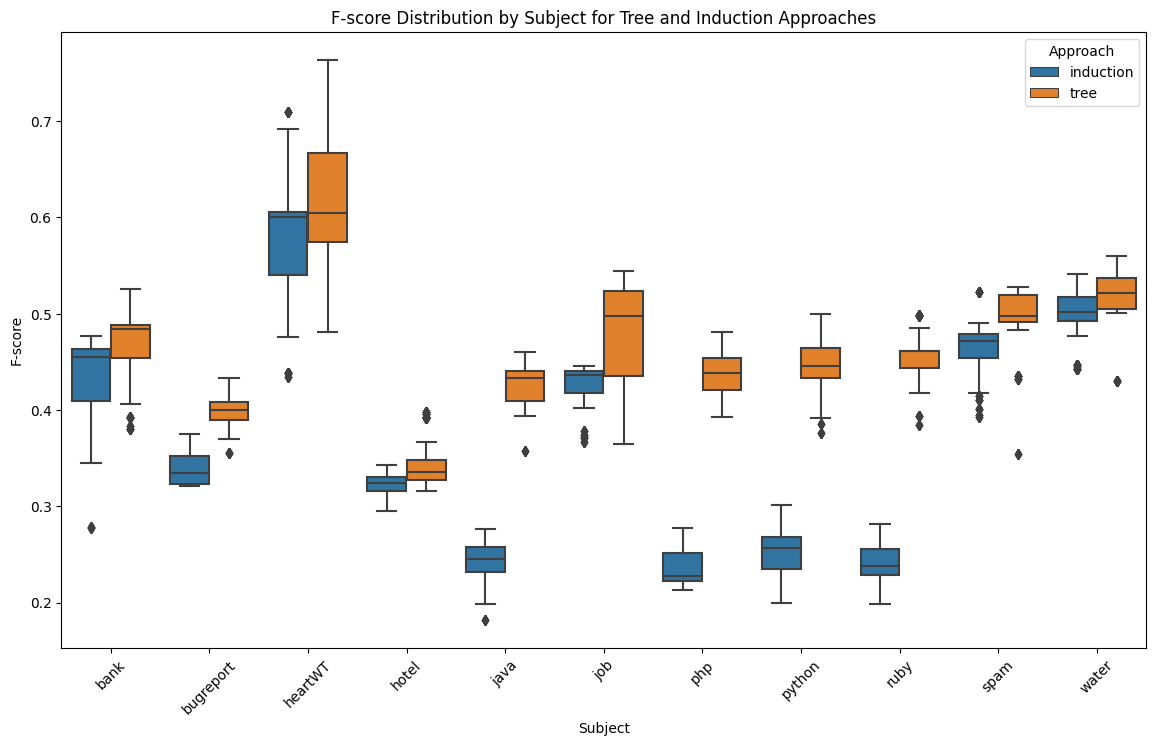

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if different

# Drop rows where rules == 'islearn'
df = df[df['rules'] != 'islearn']

# Calculate F-score
df['fscore'] = 2 * (df['precision_with'] * df['recall_with']) / (df['precision_with'] + df['recall_with'])

# Filter the DataFrame to include only 'tree' and 'induction' approaches
df_filtered = df[df['rules'].isin(['tree', 'induction'])]

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='blackbox', y='fscore', hue='rules', data=df_filtered)
plt.title('F-score Distribution by Subject for Tree and Induction Approaches')
plt.xlabel('Subject')
plt.ylabel('F-score')
plt.xticks(rotation=45)
plt.legend(title='Approach')
plt.show()

# MMD vs. MMD_Feature

In [295]:
# Create a new DataFrame as a copy of the original
df_mmd_mmd2 = pd.read_csv('../evaluation/results.csv')

# Relabel the rules column in the new DataFrame
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 3) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'mmd2'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 0) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'mmd'

# Filter rows where rules is either 'induction' or 'mmd2'
df_mmd_mmd2 = df_mmd_mmd2[df_mmd_mmd2['rules'].isin(['mmd', 'mmd2'])]

# df_mmd_mmd2.reset_index()
# Display the new DataFrame
# df_mmd_mmd2[df_mmd_mmd2['rules'].isin(['mmd', "mmd2"])]
# df_mmd_mmd2.head()

In [296]:
# Calculate F-score
df_mmd_mmd2['fscore'] = 2 * (df_mmd_mmd2['precision_with'] * df_mmd_mmd2['recall_with']) / (df_mmd_mmd2['precision_with'] + df_mmd_mmd2['recall_with'])
# df_mmd_mmd2.head()

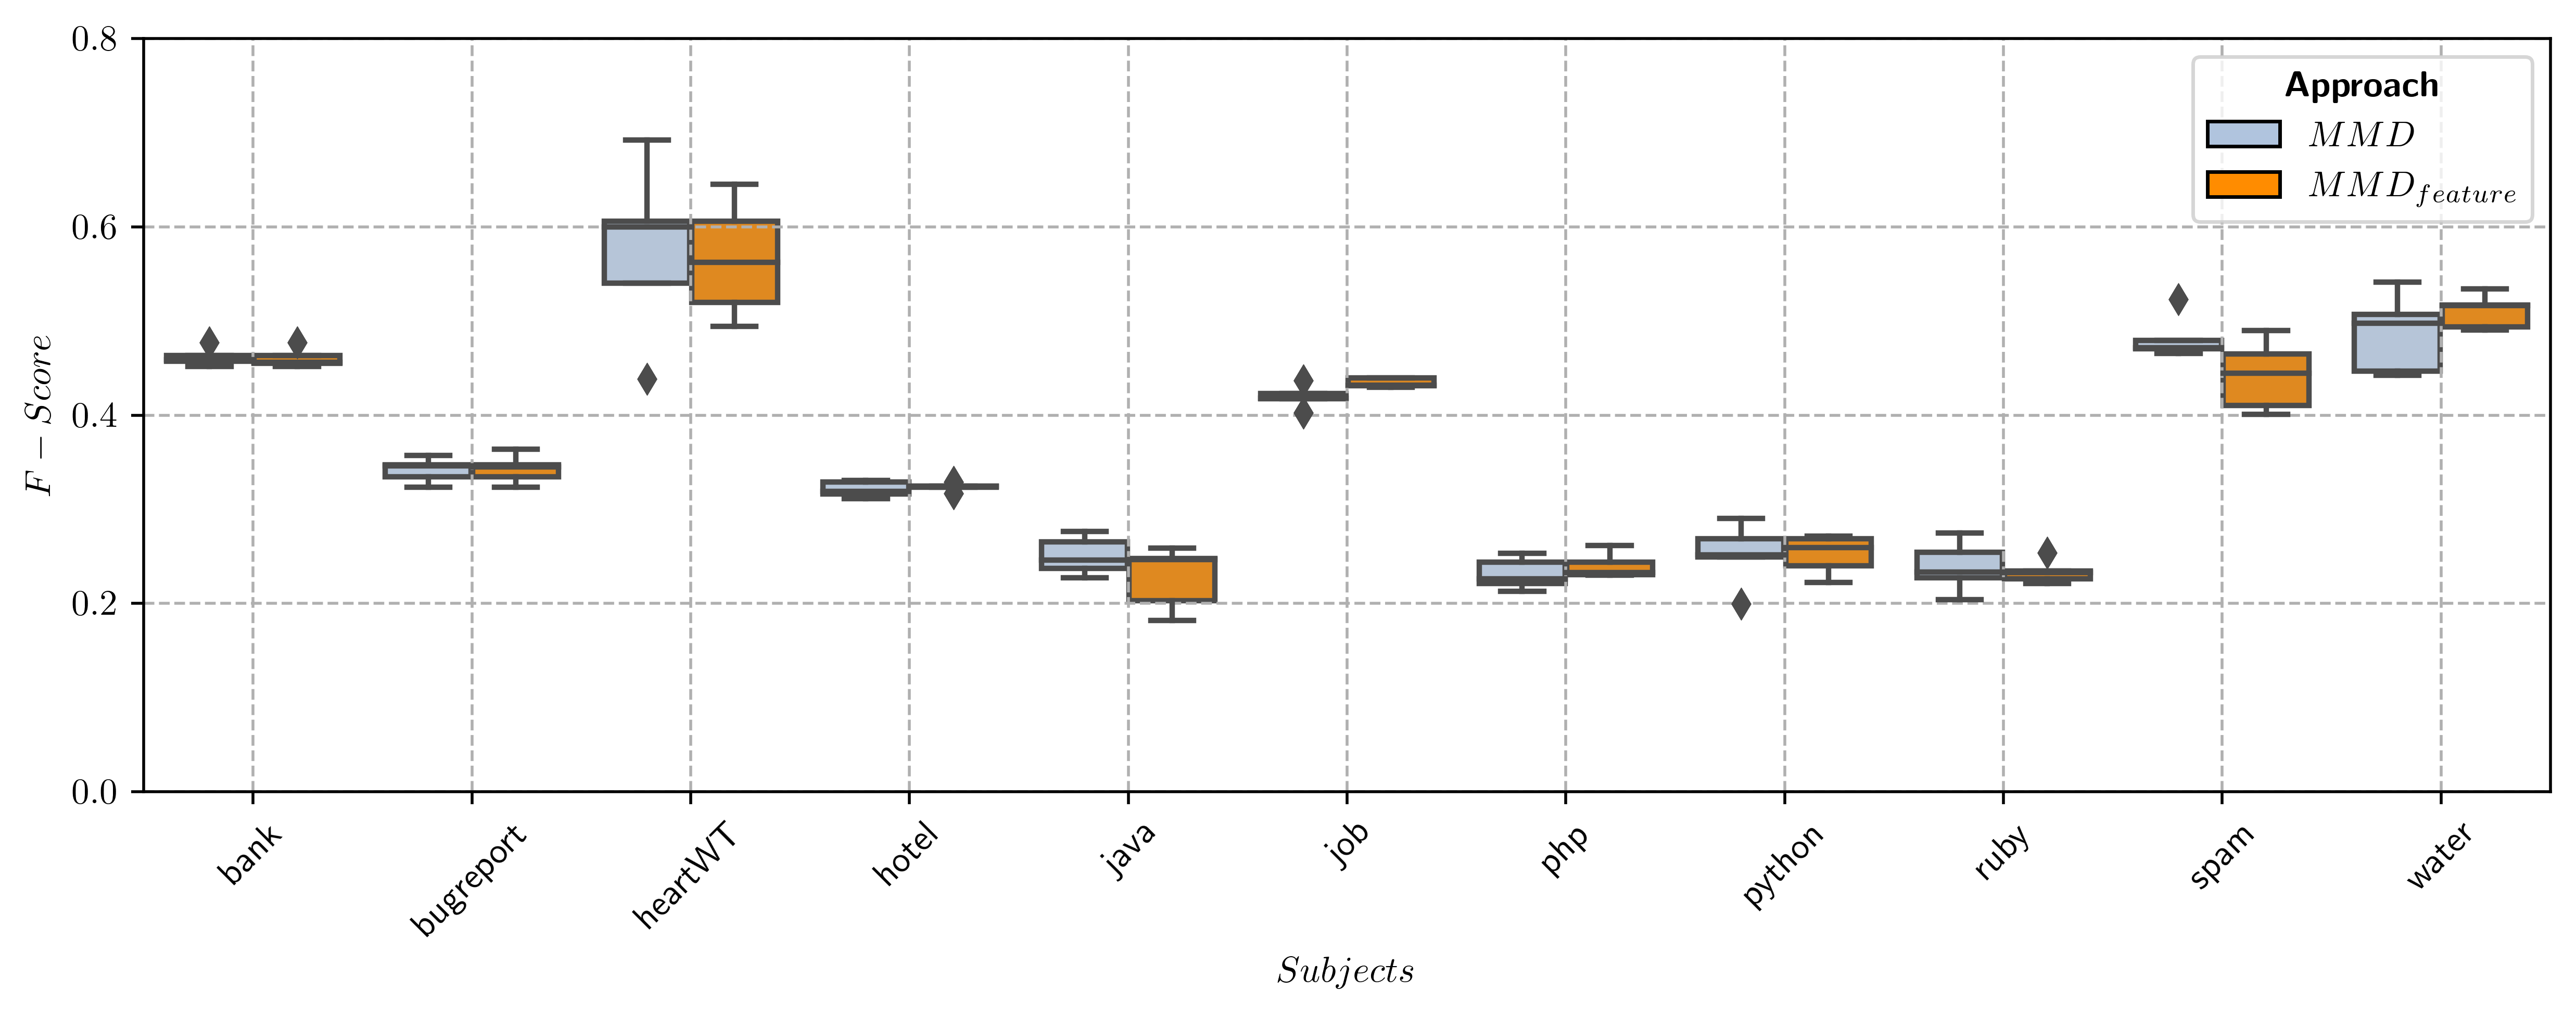

In [421]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'mmd2': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='fscore', hue='rules', data=df_mmd_mmd2, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$F-Score$')
plt.yticks(np.arange(0, 0.81, 0.2))

plt.xticks(rotation=45)
first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue', label='Decision Tree')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange',label=r'$MMD_{feature}$')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$MMD_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ1-fscore.pdf')

### Statistical Analysis

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_mmd_mmd2['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['fscore']
    mmd2 = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['fscore']
    
    if len(mmd) > 1 and len(mmd2) > 1:  # Ensure there are enough samples
        # u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='greater')
        u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='two-sided')
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Mann-Whitney U Test Results by Subject", dataframe=results_df)

print(results_df)

      subject  u_statistic   p_value  significant
0        bank        262.5  0.330066        False
1   bugreport        300.0  0.813905        False
2     heartWT        287.5  0.631851        False
3       hotel        320.0  0.891484        False
4        java        225.0  0.089846        False
5         job        550.0  0.000004         True
6         php        437.5  0.014903         True
7      python        300.0  0.815016        False
8        ruby        255.0  0.266608        False
9        spam        100.0  0.000036         True
10      water        400.0  0.089923        False


### Time

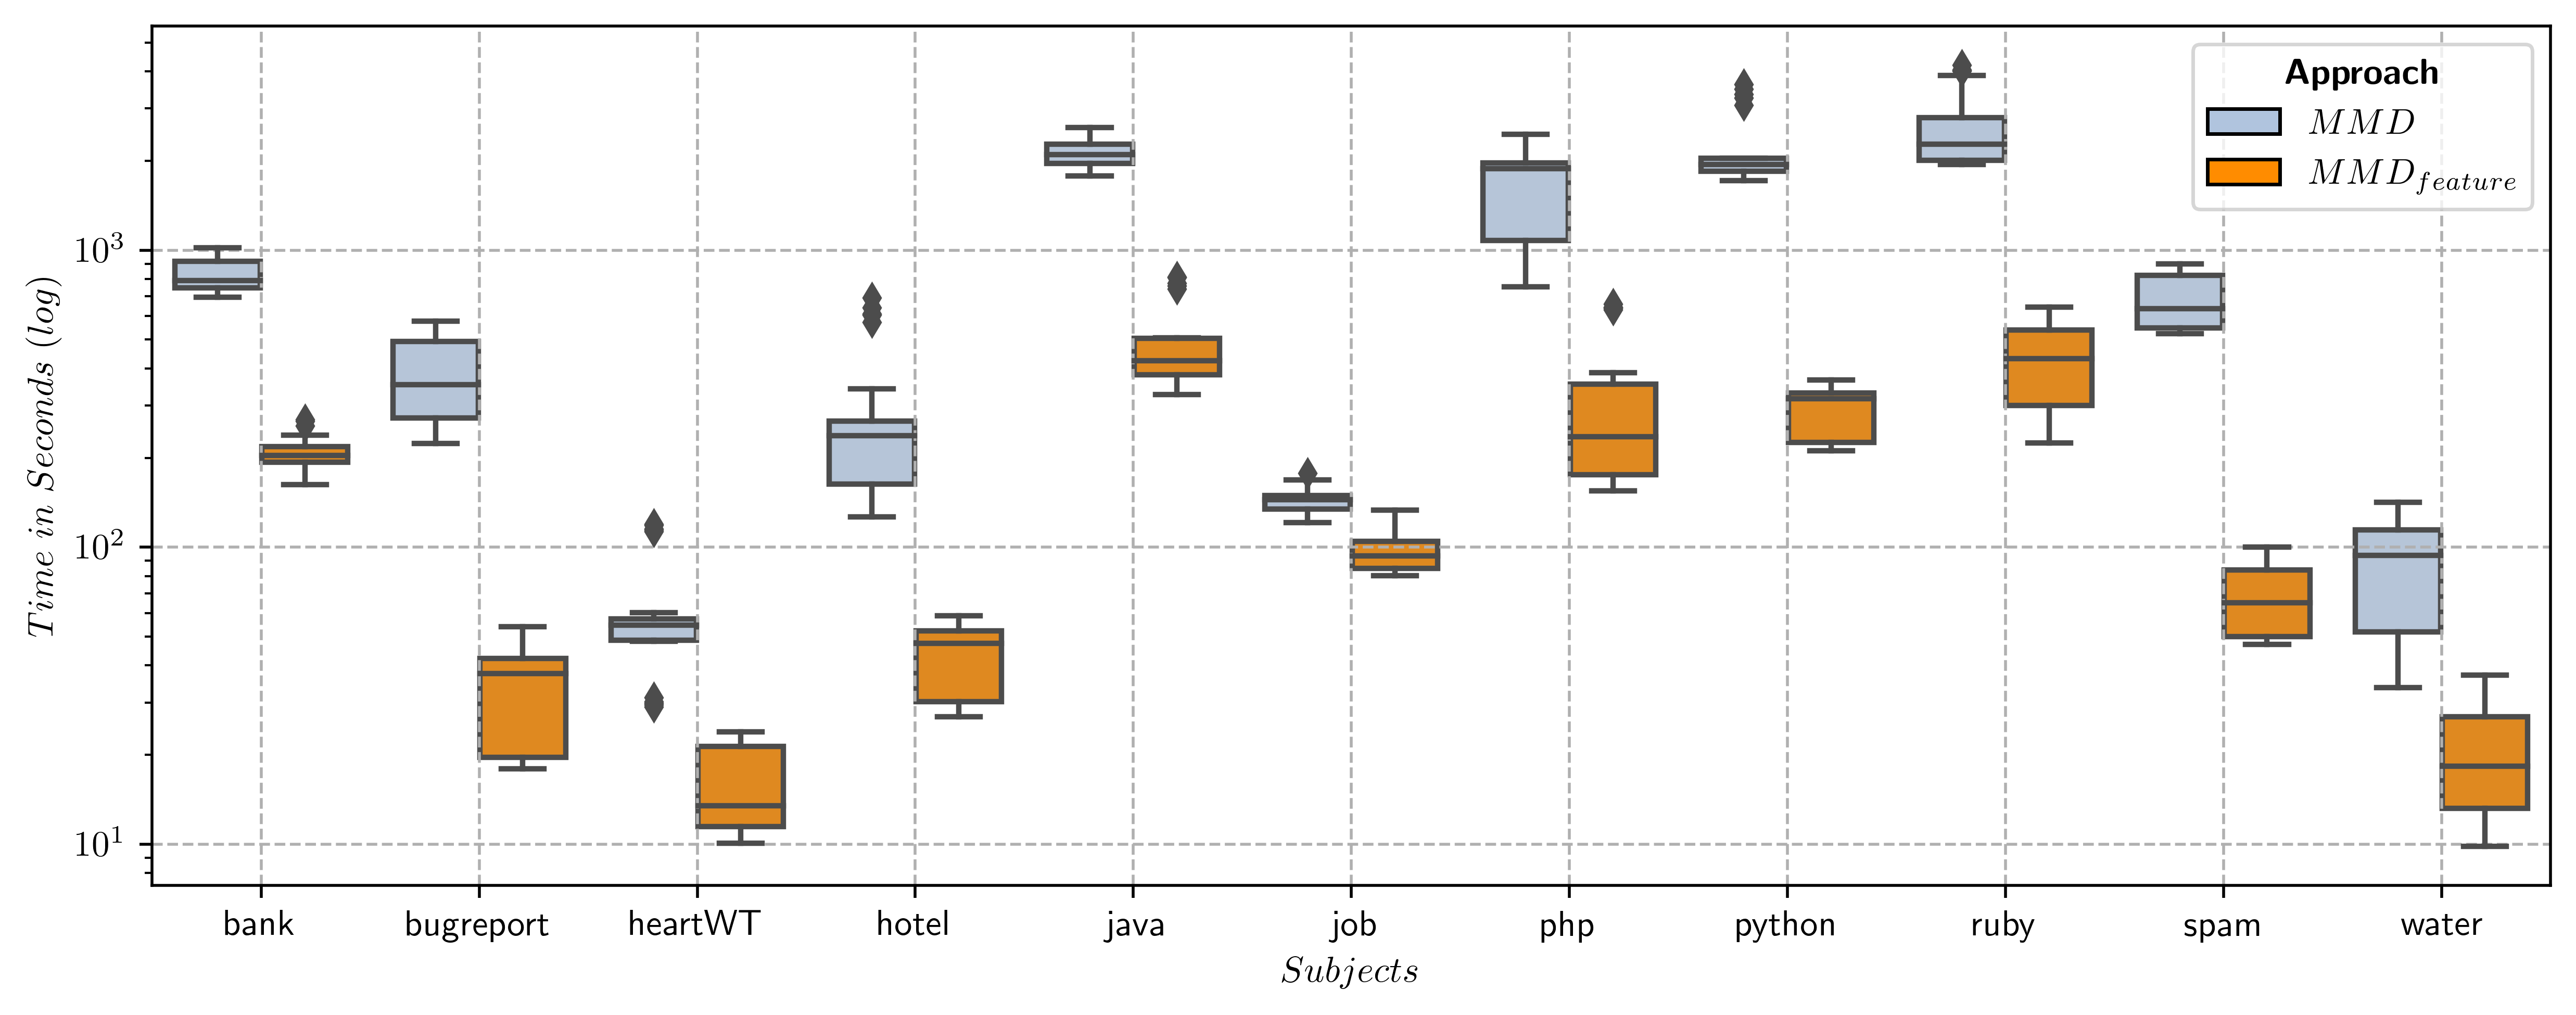

In [420]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'mmd2': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='time_with', hue='rules', data=df_mmd_mmd2, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$Time$ $in$ $Seconds$ $(log)$')
plt.yscale('log')

#plt.xticks(rotation=45)
first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue', label='Decision Tree')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange',label=r'$MMD_{feature}$')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$MMD_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ1-time.pdf')

In [415]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_mmd_mmd2['blackbox'].unique()

# Initialize results list
results = []

for subject in subjects:
    mmd = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    mmd2 = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    
    if len(mmd) > 1 and len(mmd2) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='less')
        
        mmd_min = mmd.min()
        mmd_max = mmd.max()
        mmd_median = mmd.median()
        
        mmd2_min = mmd2.min()
        mmd2_max = mmd2.max()
        mmd2_median = mmd2.median()
        
        improvement_factor = round((mmd_median / mmd2_median), 1) if mmd2_median != 0 else float('inf')
        
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'mmd_min': mmd_min,
            'mmd_median': mmd_median,
            'mmd_max': mmd_max,
            'mmd2_min': mmd2_min,
            'mmd2_median': mmd2_median,
            'mmd2_max': mmd2_max,
            'improvement_factor': improvement_factor
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df
# Display results
latex = results_df.drop(["u_statistic", "significant"], axis=1)
print(latex.to_latex(index=False))

\begin{tabular}{lrrrrrrrr}
\toprule
  subject &      p\_value &  mmd\_min &  mmd\_median &  mmd\_max &  mmd2\_min &  mmd2\_median &  mmd2\_max &  improvement\_factor \\
\midrule
     bank & 7.078281e-10 &  695.454 &     791.027 & 1017.551 &   162.383 &      203.448 &   268.722 &                 3.9 \\
bugreport & 7.078281e-10 &  223.582 &     352.162 &  576.908 &    17.937 &       37.575 &    53.945 &                 9.4 \\
  heartWT & 7.078281e-10 &   29.080 &      54.761 &  119.522 &    10.103 &       13.488 &    23.866 &                 4.1 \\
    hotel & 7.078281e-10 &  126.757 &     237.681 &  691.516 &    26.866 &       47.569 &    58.901 &                 5.0 \\
     java & 7.078281e-10 & 1778.969 &    2098.173 & 2589.793 &   325.901 &      424.383 &   811.743 &                 4.9 \\
      job & 1.287108e-09 &  121.029 &     144.736 &  177.839 &    80.101 &       93.463 &   133.297 &                 1.5 \\
      php & 7.078281e-10 &  753.267 &    1877.204 & 2452.397 &   154.542

/var/folders/44/tdfnzq5x35j91n3gd2pc6jlc0000gn/T/ipykernel_36611/2290586058.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(latex.to_latex(index=False))


# MMD vs. MMD Feature vs. Tree

In [390]:
# Create a new DataFrame as a copy of the original
df_tree = pd.read_csv('../evaluation/results.csv')

# Relabel the rules column in the new DataFrame
df_tree.loc[(df_tree['learner'] == 3) & (df_tree['rules'] == 'induction') & (df_tree['coverage'] == 0.6), 'rules'] = 'mmd2'
df_tree.loc[(df_tree['learner'] == 0) & (df_tree['rules'] == 'induction') & (df_tree['coverage'] == 0.6), 'rules'] = 'mmd'

df_tree.loc[(df_tree['learner'] == 3) & (df_tree['rules'] == 'tree') & (df_tree['coverage'] == 0.6), 'rules'] = 'tree_comp'
#df_tree.loc[(df_tree['learner'] == 0) & (df_tree['rules'] == 'tree') & (df_tree['coverage'] == 0.6), 'rules'] = 'tree_comp_0'
#df_tree.loc[(df_tree['learner'] == 6) & (df_tree['rules'] == 'tree') & (df_tree['coverage'] == 0.6), 'rules'] = 'tree_comp_4'


# Filter rows where rules is either 'induction' or 'mmd2'
#df_tree = df_tree[df_tree['rules'].isin(['mmd', 'mmd2', 'tree_comp', "tree_comp_0", "tree_comp_4"])]
df_tree = df_tree[df_tree['rules'].isin(['mmd', 'mmd2', 'tree_comp'])]

# df_tree.reset_index()
# df_tree.head(20)

In [391]:
# Calculate F-score
df_tree['fscore'] = 2 * (df_tree['precision_with'] * df_tree['recall_with']) / (df_tree['precision_with'] + df_tree['recall_with'])
# df_tree.head()

In [392]:
df_tree = df_tree[df_tree['rules'].isin(['mmd', 'tree_comp'])]

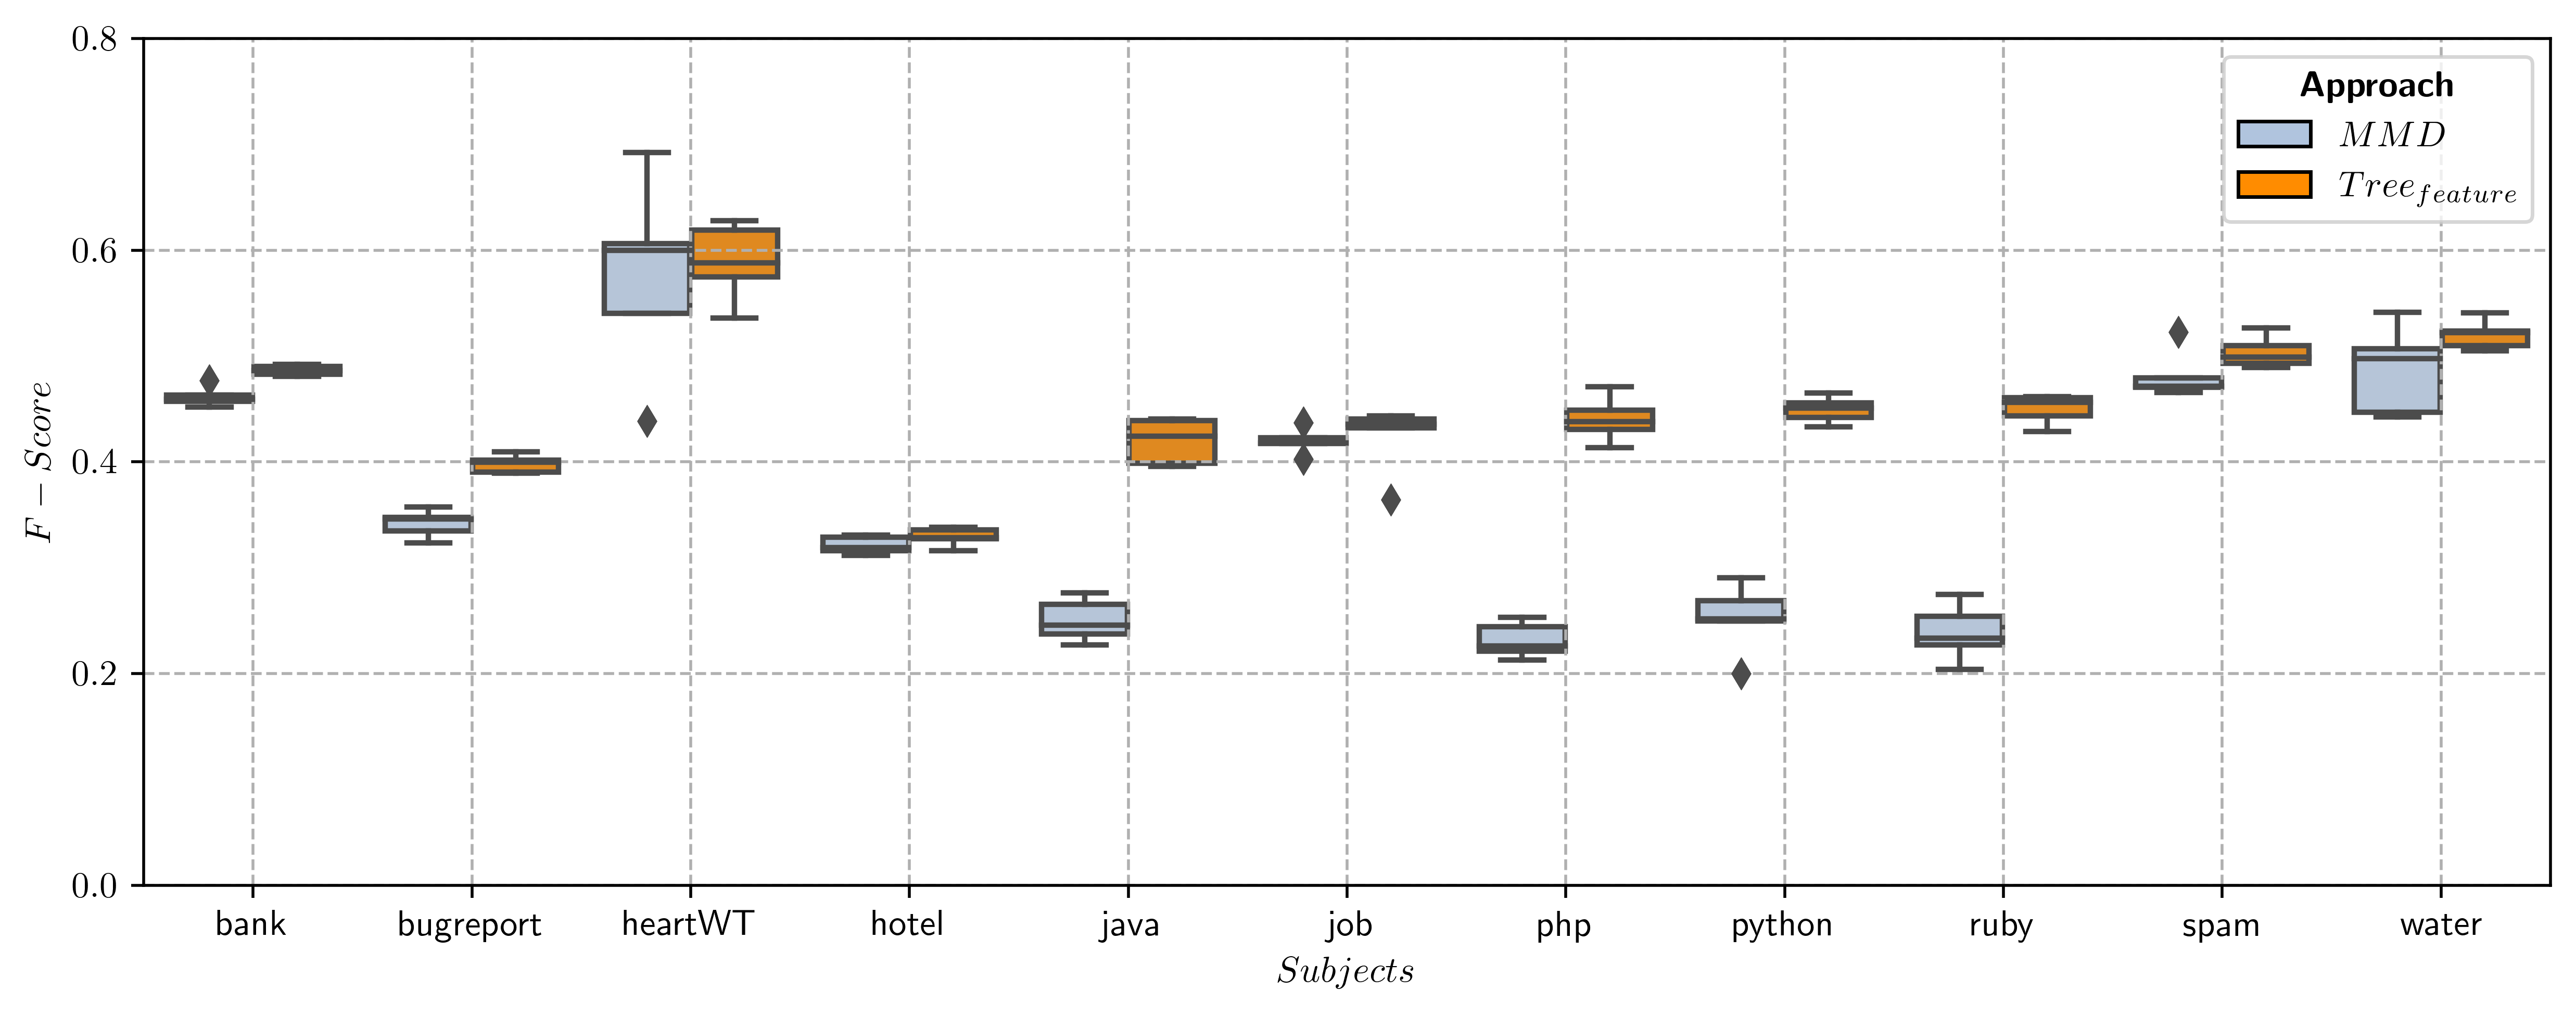

In [419]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'tree_comp': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='fscore', hue='rules', data=df_tree, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$F-Score$')
#plt.xticks(rotation=45)
plt.yticks(np.arange(0, 0.81, 0.2))

first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$Tree_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ2-fscore.pdf')

In [394]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_tree['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]['fscore']
    tree = df_tree[(df_tree['rules'] == 'tree_comp') & (df_tree['blackbox'] == subject)]['fscore']
    
    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd, alternative='greater')
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Mann-Whitney U Test Results by Subject", dataframe=results_df)

print(results_df)

      subject  u_statistic       p_value  significant
0        bank        625.0  5.898836e-10         True
1   bugreport        625.0  5.898836e-10         True
2     heartWT        325.0  4.075079e-01        False
3       hotel        425.0  1.452393e-02         True
4        java        625.0  5.898836e-10         True
5         job        450.0  3.780747e-03         True
6         php        625.0  5.898836e-10         True
7      python        625.0  5.898836e-10         True
8        ruby        625.0  5.898836e-10         True
9        spam        525.0  1.787958e-05         True
10      water        475.0  7.950967e-04         True


## MMD vs. Tree Time

In [395]:
# Filter the DataFrame to include only 'tree' and 'induction' approaches
df_tree = df_tree[df_tree['rules'].isin(['mmd', 'tree_comp'])]

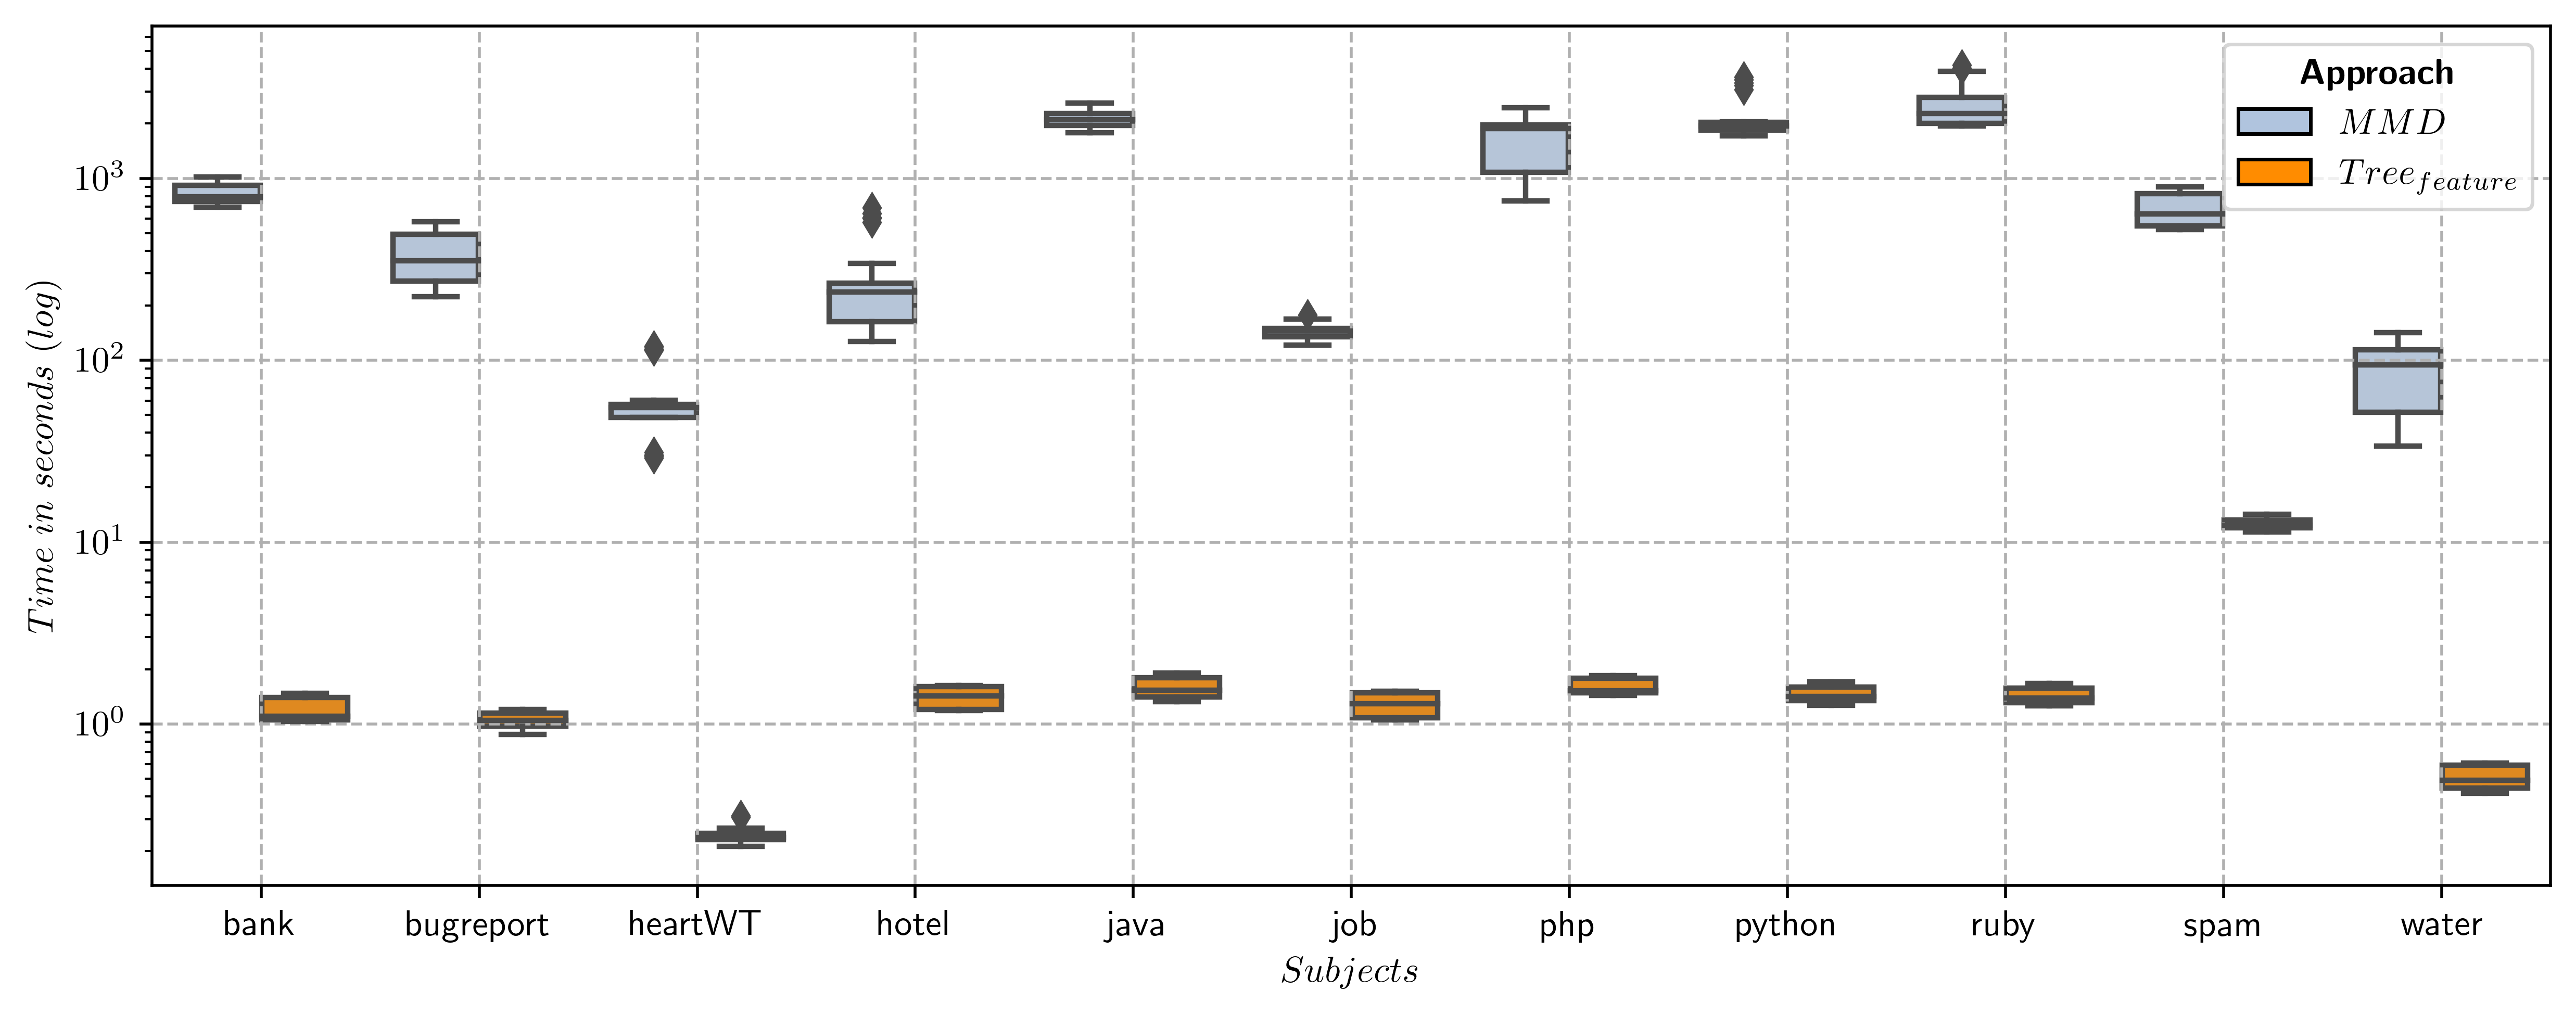

In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'tree_comp': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='time_with', hue='rules', data=df_tree, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$Time$ $in$ $Seconds$ $(log)$')
plt.yscale('log')
#plt.xticks(rotation=45)

first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$Tree_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ2-time.pdf')

In [397]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_tree['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]['time_with']
    tree = df_tree[(df_tree['rules'] == 'tree_comp') & (df_tree['blackbox'] == subject)]['time_with']
    
    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd, alternative='less')
        
        mmd_min = mmd.min()
        mmd_max = mmd.max()
        mmd_median = mmd.median()
        
        tree_min = tree.min()
        tree_max = tree.max()
        tree_median = tree.median()
        
        improvement_factor = round((mmd_median / tree_median) * 100, 1) if mmd_median != 0 else float('inf')
        
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'mmd_min': mmd_min,
            'mmd_max': mmd_max,
            'mmd_median': mmd_median,
            'tree_min': tree_min,
            'tree_max': tree_max,
            'tree_median': tree_median,
            'improvement_factor': improvement_factor
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

results_df

,subject,u_statistic,p_value,significant,mmd_min,mmd_max,mmd_median,tree_min,tree_max,tree_median,improvement_factor
0,bank,0.0,7.065512e-10,True,695.454,1017.551,791.027,1.033,1.479,1.100,71911.5
1,bugreport,0.0,7.078281e-10,True,223.582,576.908,352.162,0.877,1.199,1.044,33732.0
2,heartWT,0.0,7.033679e-10,True,29.080,119.522,54.761,0.213,0.314,0.238,23008.8
3,hotel,0.0,7.071894e-10,True,126.757,691.516,237.681,1.188,1.629,1.425,16679.4
4,java,0.0,7.078281e-10,True,1778.969,2589.793,2098.173,1.331,1.905,1.537,136510.9
5,job,0.0,7.065512e-10,True,121.029,177.839,144.736,1.053,1.512,1.291,11211.2
6,php,0.0,7.071894e-10,True,753.267,2452.397,1877.204,1.433,1.846,1.526,123014.7
7,python,0.0,7.078281e-10,True,1712.668,3617.207,1944.548,1.269,1.700,1.415,137423.9
8,ruby,0.0,7.065512e-10,True,1942.289,4196.548,2277.169,1.260,1.673,1.389,163943.1
9,spam,0.0,7.078281e-10,True,523.052,897.119,635.424,11.368,14.215,12.367,5138.1
